# Test Notebook

**Simple Execution** is the first test, where I manually instantiate all the necessary classes and perform a non-automatic computation.

**Multi-Round Execution** is the automatic computation of the algorithm.

In [1]:
import os
import numpy as np

from Stationary.core import *
from Stationary.utils import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


## Simple Execution

In [2]:
w1 = Worker(coef = np.array([0, 0]), intercept = np.array([0]), model=linear_model.LinearRegression())
w2 = Worker(coef = np.array([0, 0]), intercept = np.array([0]), model=linear_model.LinearRegression())
w3 = Worker(coef = np.array([0, 0]), intercept = np.array([0]), model=linear_model.LinearRegression())

In [3]:
l = []
l.append(w1)
l.append(w2)
l.append(w3)

In [4]:
dataset_X, dataset_y = datasets.load_diabetes(return_X_y=True)

In [12]:
server = Server(coef = np.array([0, 0]), intercept = np.array([0]), workers = l, num_features = dataset_X[0].size)

In [13]:
train_w1_X, train_w2_X, train_w3_X, test_X = np.split(dataset_X, 
                                                      [int(.25 * len(dataset_X)), 
                                                       int(.50 * len(dataset_X)), 
                                                       int(.75 * len(dataset_X))
                                                      ])

In [14]:
train_w1_y, train_w2_y, train_w3_y, test_y = np.split(dataset_y, 
                                                      [int(.25 * len(dataset_y)), 
                                                       int(.50 * len(dataset_y)), 
                                                       int(.75 * len(dataset_y))
                                                      ])

In [15]:
train_w1_1, train_w1_2, train_w1_3 = np.split(train_w1_X,  
                                                [int(.33 * len(train_w1_X)), 
                                                int(.66 * len(train_w1_X))
                                                ])

train_w2_1, train_w2_2, train_w2_3 = np.split(train_w2_X,  
                                                [int(.33 * len(train_w2_X)), 
                                                int(.66 * len(train_w2_X))
                                                ])

train_w3_1, train_w3_2, train_w3_3 = np.split(train_w3_X,  
                                                [int(.33 * len(train_w3_X)), 
                                                int(.66 * len(train_w3_X))
                                                ])




train_w1_y_1, train_w1_y_2, train_w1_y_3 = np.split(train_w1_y, 
                                                      [int(.33 * len(train_w1_y)), 
                                                       int(.66 * len(train_w1_y))
                                                      ])

train_w2_y_1, train_w2_y_2, train_w2_y_3 = np.split(train_w2_y, 
                                                      [int(.33 * len(train_w2_y)), 
                                                       int(.66 * len(train_w2_y))
                                                      ])

train_w3_y_1, train_w3_y_2, train_w3_y_3 = np.split(train_w3_y, 
                                                      [int(.33 * len(train_w3_y)), 
                                                       int(.66 * len(train_w3_y))
                                                      ])

In [8]:
w1.train(X = train_w1_X, y = train_w1_y)
w2.train(X = train_w2_X, y = train_w2_y)
w3.train(X = train_w3_X, y = train_w3_y)


In [9]:
w3.model.coef_

array([  57.18276806,  -75.1429839 ,  537.2001464 ,  370.81987107,
         43.25106484,   37.51865177, -331.11325767, -154.85685861,
        542.60138261,  -31.62912061])

In [10]:
server.aggregation()

In [11]:
print('Server Coef: ', server.coef)
print('Server intercept: ', server.intercept)

Server Coef:  [  -4.08894884 -202.30961161  511.95852512  280.21844215 -322.12129046
   70.23540153  -41.16479233  135.70885414  625.80283674   74.97544225]
Server intercept:  [150.45345618]


In [12]:
server.return_to_workers()

In [13]:
w3.coef

array([  -4.08894884, -202.30961161,  511.95852512,  280.21844215,
       -322.12129046,   70.23540153,  -41.16479233,  135.70885414,
        625.80283674,   74.97544225])

In [14]:
pred_w1 = w1.evaluate(test_X)
print('Mean squared error worker 1: %.2f' 
         % mean_squared_error(test_y, pred_w1))
print('Coefficient of determinaton of worker 1: %.2f'
         % r2_score(test_y, pred_w1))

print('----------')

pred_w2 = w2.evaluate(test_X)
print('Mean squared error worker 2: %.2f' 
         % mean_squared_error(test_y, pred_w2))
print('Coefficient of determinaton of worker 2: %.2f'
         % r2_score(test_y, pred_w2))

print('----------')

pred_w3 = w3.evaluate(test_X)
print('Mean squared error worker 3: %.2f' 
         % mean_squared_error(test_y, pred_w3))
print('Coefficient of determinaton of worker 3: %.2f'
         % r2_score(test_y, pred_w3))

Mean squared error worker 1: 3226.93
Coefficient of determinaton of worker 1: 0.47
----------
Mean squared error worker 2: 2978.78
Coefficient of determinaton of worker 2: 0.51
----------
Mean squared error worker 3: 2893.24
Coefficient of determinaton of worker 3: 0.53


In [15]:
server.return_to_workers()

In [16]:
pred_server = server.evaluate(test_X)
print('Mean squared error: %.2f' 
         % mean_squared_error(test_y, pred_server))
print('Coefficient of determinaton: %.2f'
         % r2_score(test_y, pred_server))

Mean squared error worker 1: 2811.18
Coefficient of determinaton of worker 1: 0.54


# Multi Rounds

In [17]:
num_workers = 4
num_rounds = 20

In [18]:
dataset_X, dataset_y = datasets.load_diabetes(return_X_y=True)
dataset_X = dataset_X[:, np.newaxis, 2]

In [19]:
worker_list = []
for i in range(0, num_workers):
    worker_list.append(Worker(coef = np.zeros(shape=dataset_X[0].size), intercept = np.zeros(shape=1), model=linear_model.LinearRegression()))

In [20]:
train_percentage = 0.95


train_X, test_X = np.split(dataset_X, 
            [int(train_percentage * len(dataset_X))
            ])

train_y, test_y = np.split(dataset_y, 
            [int(train_percentage * len(dataset_y))
            ])

In [21]:
server = Server(coef = np.zeros(shape=dataset_X[0].size), intercept = np.zeros(shape=1), workers = worker_list, num_features = dataset_X[0].size)

In [22]:
train_list_X = splitDataset(train_X, num_workers, num_rounds)
train_list_y = splitDataset(train_y, num_workers, num_rounds)

In [23]:
error = []
score = []

for i in range(0, num_rounds):
    
    for j in range(0, num_workers):
        worker_list[j].train(X = train_list_X[i*num_workers+j] , y = train_list_y[i*num_workers+j])

    server.aggregation() 
    server.return_to_workers()
    
    pred_server = server.evaluate(test_X)
    print('------ROUND {}------'.format(i+1))
    print('Mean squared error: %.2f' 
          % mean_squared_error(test_y, pred_server))
    print('Coefficient of determinaton: %.2f \n'
          % r2_score(test_y, pred_server))
    error.append(mean_squared_error(test_y, pred_server))
    score.append(r2_score(test_y, pred_server))
    

------ROUND 1------
Mean squared error: 2741.53
Coefficient of determinaton: 0.43 

------ROUND 2------
Mean squared error: 2557.68
Coefficient of determinaton: 0.47 

------ROUND 3------
Mean squared error: 2507.33
Coefficient of determinaton: 0.48 

------ROUND 4------
Mean squared error: 2668.21
Coefficient of determinaton: 0.45 

------ROUND 5------
Mean squared error: 2580.28
Coefficient of determinaton: 0.47 

------ROUND 6------
Mean squared error: 2710.86
Coefficient of determinaton: 0.44 

------ROUND 7------
Mean squared error: 2367.54
Coefficient of determinaton: 0.51 

------ROUND 8------
Mean squared error: 2315.18
Coefficient of determinaton: 0.52 

------ROUND 9------
Mean squared error: 2346.99
Coefficient of determinaton: 0.52 

------ROUND 10------
Mean squared error: 2591.22
Coefficient of determinaton: 0.47 

------ROUND 11------
Mean squared error: 2561.98
Coefficient of determinaton: 0.47 

------ROUND 12------
Mean squared error: 2502.98
Coefficient of determinat

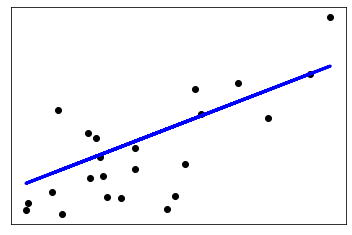

In [24]:
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, pred_server, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()